            1. open  2. high  ...  7. dividend amount  8. split coefficient
date                          ...                                          
1998-01-02   129.63  131.500  ...                 0.0                   1.0
1998-01-05   131.25  133.630  ...                 0.0                   1.0
1998-01-06   129.75  133.000  ...                 0.0                   1.0
1998-01-07   129.88  131.190  ...                 0.0                   1.0
1998-01-08   128.63  132.130  ...                 0.0                   1.0
1998-01-09   130.06  131.500  ...                 0.0                   1.0
1998-01-12   124.62  130.000  ...                 0.0                   1.0
1998-01-13   129.50  132.250  ...                 0.0                   1.0
1998-01-14   132.13  132.500  ...                 0.0                   1.0
1998-01-15   130.38  133.000  ...                 0.0                   1.0
1998-01-16   132.38  135.380  ...                 0.0                   1.0
1998-01-20  

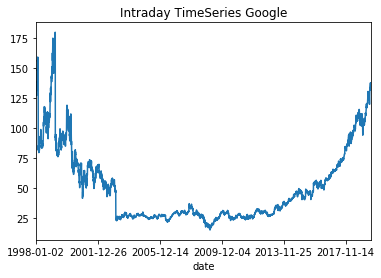

In [0]:

from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from fbprophet import Prophet
from scipy.stats import norm
ts = TimeSeries(key='XCLGRT2QLL8P4MK1',output_format='pandas')
data, meta_data = ts.get_daily_adjusted(symbol='MSFT', outputsize='full')
print(data)
data['4. close'].plot()
plt.title('Intraday TimeSeries Google')
plt.show()


In [0]:
pip install alpha_vantage

  Stored in directory: /root/.cache/pip/wheels/21/9c/02/b7cfae63f7119f4089f229ba1a09ce90fabbaf96199c2890be
Successfully built alpha-vantage


In [0]:
dataset = data.reset_index(level=0, inplace=True)

In [0]:
dataset_clean = data.rename(columns = {'date' : 'ds','4. close' : 'y'})

dataset_clean.head()

ds  1. open  ...  7. dividend amount  8. split coefficient
0  1998-01-02   129.63  ...                 0.0                   1.0
1  1998-01-05   131.25  ...                 0.0                   1.0
2  1998-01-06   129.75  ...                 0.0                   1.0
3  1998-01-07   129.88  ...                 0.0                   1.0
4  1998-01-08   128.63  ...                 0.0                   1.0

[5 rows x 9 columns]

In [0]:
model = Prophet()
model.add_country_holidays(country_name='US')
model.fit(dataset_clean)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
future = model.make_future_dataframe(periods = 255)

In [0]:
forecast = model.predict(future)

forecast

ds       trend  ...  multiplicative_terms_upper        yhat
0    1998-01-02  113.925772  ...                         0.0  114.249634
1    1998-01-05  113.939825  ...                         0.0  114.390147
2    1998-01-06  113.944510  ...                         0.0  114.427148
3    1998-01-07  113.949194  ...                         0.0  114.507829
4    1998-01-08  113.953879  ...                         0.0  114.609413
5    1998-01-09  113.958563  ...                         0.0  114.668996
6    1998-01-12  113.972617  ...                         0.0  114.825912
7    1998-01-13  113.977302  ...                         0.0  114.877544
8    1998-01-14  113.981986  ...                         0.0  114.977425
9    1998-01-15  113.986671  ...                         0.0  115.102471
10   1998-01-16  113.991355  ...                         0.0  115.189245
11   1998-01-20  114.010093  ...                         0.0  115.525849
12   1998-01-21  114.014778  ...                         0.0  115.656367
13   1998-01-22  114.019463  ...                         0.0  115.808476
14   1998-01-23  114.024147  ...                         0.0  115.917053
15   1998-01-26  114.038201  ...                         0.0  116.186167
16   1998-01-27  114.042885  ...                         0.0  116.254340
17   1998-01-28  114.047570  ...                         0.0  116.355592
18   1998-01-29  114.052254  ...                         0.0  116.464097
19   1998-01-30  114.056939  ...                         0.0  116.513866
20   1998-02-02  114.070993  ...                         0.0  116.511529
21   1998-02-03  114.075677  ...                         0.0  116.458099
22   1998-02-04  114.080362  ...                         0.0  116.423444
23   1998-02-05  114.085046  ...                         0.0  116.383090
24   1998-02-06  114.089731  ...                         0.0  116.272790
25   1998-02-09  114.103784  ...                         0.0  115.745667
26   1998-02-10  114.108469  ...                         0.0  115.511490
27   1998-02-11  114.113153  ...                         0.0  115.298258
28   1998-02-12  114.117838  ...                         0.0  115.084746
29   1998-02-13  114.122523  ...                         0.0  114.809993
...         ...         ...  ...                         ...         ...
5636 2020-02-16  131.360933  ...                         0.0  142.564250
5637 2020-02-17  131.411540  ...                         0.0  130.990743
5638 2020-02-18  131.462148  ...                         0.0  130.703326
5639 2020-02-19  131.512755  ...                         0.0  130.461872
5640 2020-02-20  131.563363  ...                         0.0  130.247056
5641 2020-02-21  131.613970  ...                         0.0  129.999303
5642 2020-02-22  131.664578  ...                         0.0  141.035686
5643 2020-02-23  131.715185  ...                         0.0  140.821502
5644 2020-02-24  131.765793  ...                         0.0  129.318998
5645 2020-02-25  131.816400  ...                         0.0  129.128592
5646 2020-02-26  131.867008  ...                         0.0  129.008513
5647 2020-02-27  131.917615  ...                         0.0  128.937252
5648 2020-02-28  131.968223  ...                         0.0  128.852543
5649 2020-02-29  132.018830  ...                         0.0  140.068312
5650 2020-03-01  132.069438  ...                         0.0  140.046321
5651 2020-03-02  132.120046  ...                         0.0  128.744967
5652 2020-03-03  132.170653  ...                         0.0  128.760583
5653 2020-03-04  132.221261  ...                         0.0  128.847175
5654 2020-03-05  132.271868  ...                         0.0  128.978959
5655 2020-03-06  132.322476  ...                         0.0  129.089448
5656 2020-03-07  132.373083  ...                         0.0  140.488493
5657 2020-03-08  132.423691  ...                         0.0  140.634025
5658 2020-03-09  132.474298  ...                         0.0  129.48094

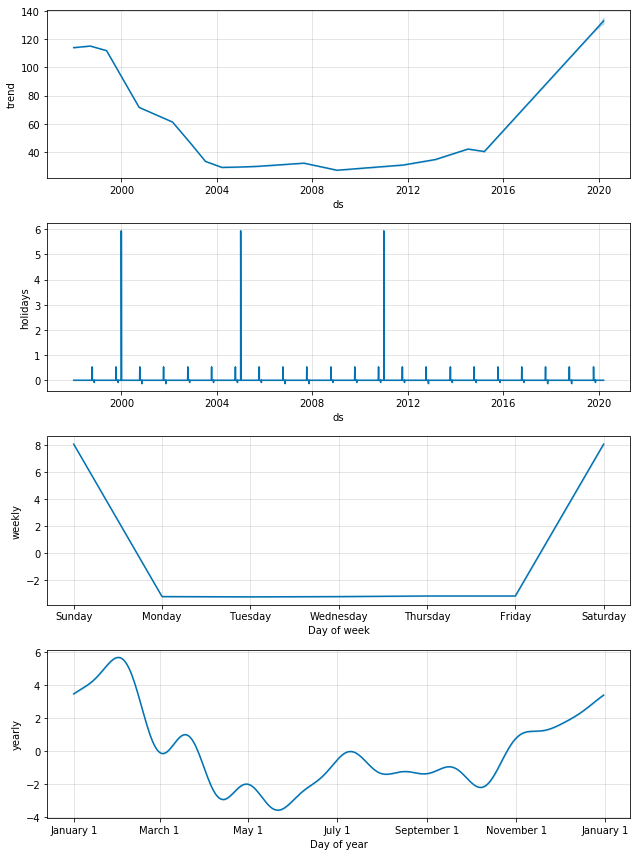

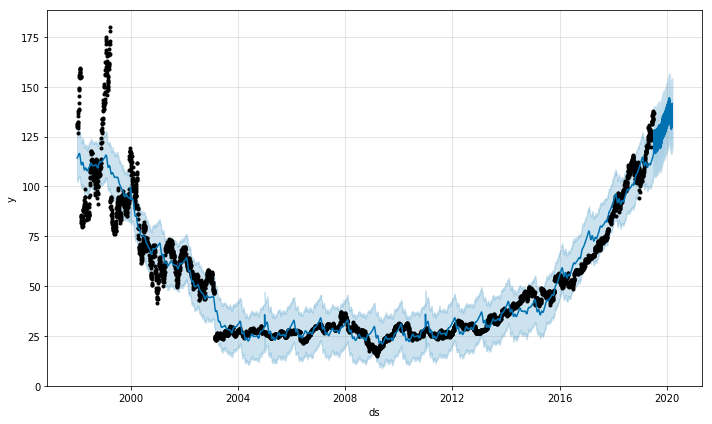

In [0]:
model.plot_components(forecast)

dataset_clean.tail(10)

future.tail()

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

plot = model.plot(forecast)

            1. open  2. high  ...  7. dividend amount  8. split coefficient
date                          ...                                          
1998-01-02   129.63  131.500  ...                 0.0                   1.0
1998-01-05   131.25  133.630  ...                 0.0                   1.0
1998-01-06   129.75  133.000  ...                 0.0                   1.0
1998-01-07   129.88  131.190  ...                 0.0                   1.0
1998-01-08   128.63  132.130  ...                 0.0                   1.0
1998-01-09   130.06  131.500  ...                 0.0                   1.0
1998-01-12   124.62  130.000  ...                 0.0                   1.0
1998-01-13   129.50  132.250  ...                 0.0                   1.0
1998-01-14   132.13  132.500  ...                 0.0                   1.0
1998-01-15   130.38  133.000  ...                 0.0                   1.0
1998-01-16   132.38  135.380  ...                 0.0                   1.0
1998-01-20  

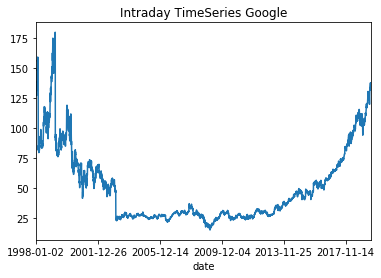

In [0]:
ts = TimeSeries(key='XCLGRT2QLL8P4MK1',output_format='pandas')
data, meta_data = ts.get_daily_adjusted(symbol='MSFT', outputsize='full')
print(data)
data['4. close'].plot()
plt.title('Intraday TimeSeries Google')
plt.show()


In [0]:
#log_returns = np.log(1 + data['4. close'].pct_change())

#log_returns


returns = data['','4. close']


from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 

In [0]:
X = returns.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

predicted=32.004714, expected=32.670000
predicted=32.647430, expected=32.770000
predicted=32.727168, expected=32.850000
predicted=32.790695, expected=32.600000
predicted=32.582052, expected=32.200000
predicted=32.192620, expected=31.990000
predicted=31.987647, expected=31.910000
predicted=31.901279, expected=31.995000
predicted=31.962762, expected=32.010000
predicted=31.969331, expected=32.590000
predicted=32.547155, expected=32.520000
predicted=32.477824, expected=32.190000
predicted=32.141058, expected=32.120000
predicted=32.116329, expected=32.255000
predicted=32.253768, expected=32.290000
predicted=32.252362, expected=31.940000
predicted=31.897804, expected=31.210000
predicted=31.194115, expected=31.520000
predicted=31.526383, expected=31.100000
predicted=31.092881, expected=30.470000
predicted=30.416651, expected=30.345000
predicted=30.341578, expected=30.975000
predicted=30.971338, expected=30.810000
predicted=30.749528, expected=31.075000
predicted=31.002863, expected=31.440000


KeyboardInterrupt: ignored

In [0]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [0]:
u = log_returns.mean()
var = log_returns.var()
drift = u - (0.5*var)
stdev = log_returns.std()

In [0]:
type(drift)

float

In [0]:
np.array(drift)

array(-0.0003036)

In [0]:
stdev.values

NameError: ignored

In [0]:
np.array(drift)

array(-0.0003036)

In [0]:
norm.ppf(0.95)

1.6448536269514722

In [0]:
x = np.random.rand(10,2)

In [0]:
Z = norm.ppf(np.random.rand(10,2))

In [0]:
t_intervals = 1000
iterations = 10

In [0]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals,iterations)))

AttributeError: ignored

In [0]:
daily_returns

NameError: ignored